# Imports

In [1]:
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim

# Creating and Reading the dataframe

In [2]:
df1 = pd.read_csv("data/covid19_italy_region.csv")
df1.head()

,SNo,Date,Country,RegionName,HospitalizedPatients
0,0,2020-02-24T18:00:00,ITA,Abruzzo,0
1,1,2020-02-24T18:00:00,ITA,Basilicata,0
2,2,2020-02-24T18:00:00,ITA,Calabria,0
3,3,2020-02-24T18:00:00,ITA,Campania,0
4,4,2020-02-24T18:00:00,ITA,Emilia-Romagna,10


# Randomly selecting 20 rows of this DataFrame to create a smaller DataFrame (e.g. df2) with these 20 rows of data.

In [3]:
df2 = df1.sample(n=20)
df2.head()

,SNo,Date,Country,RegionName,HospitalizedPatients
2170,2170,2020-06-06T17:00:00,ITA,Liguria,136
4944,4944,2020-10-16T17:00:00,ITA,Marche,73
2334,2334,2020-06-14T17:00:00,ITA,Campania,53
4923,4923,2020-10-15T17:00:00,ITA,Marche,61
4740,4740,2020-10-06T17:00:00,ITA,Sardegna,125


# Calculating the mean of HospitalizedPatients corresponding to that particular RegionName

In [4]:
df = df2.groupby("RegionName", as_index=False).mean()
df

,RegionName,SNo,HospitalizedPatients
0,Abruzzo,2814.0,28.0
1,Calabria,1283.0,125.0
2,Campania,2334.0,53.0
3,Emilia-Romagna,3143.5,1933.5
4,Liguria,2170.0,136.0
5,Marche,4933.5,67.0
6,P.A. Trento,2679.0,142.0
7,Puglia,2933.0,390.5
8,Sardegna,2409.0,62.5
9,Sicilia,3796.0,45.0


# Performing the geocoding of the data to extract the coordinates (lat & lon) of each RegionName 

In [5]:
geolocator = Nominatim(user_agent="MSc21")
from geopy.extra.rate_limiter import RateLimiter
locat = df["RegionName"]
df_temp = pd.DataFrame({'add': locat})
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
#Applying the method to pandas DataFrame
df['location'] = df_temp['add'].apply(geocode)
df['Lat'] = df['location'].apply(lambda x: x.latitude if x else None)
df['Lon'] = df['location'].apply(lambda x: x.longitude if x else None)

In [6]:
df

,RegionName,SNo,HospitalizedPatients,location,Lat,Lon
0,Abruzzo,2814.0,28.0,"(Abruzzo, Italia, (42.227681, 13.854983))",42.227681,13.854983
1,Calabria,1283.0,125.0,"(Calabria, Italia, (39.0565974, 16.5249864))",39.056597,16.524986
2,Campania,2334.0,53.0,"(Campania, Italia, (40.860672, 14.843984))",40.860672,14.843984
3,Emilia-Romagna,3143.5,1933.5,"(Emilia-Romagna, Italia, (44.525696, 11.039437))",44.525696,11.039437
4,Liguria,2170.0,136.0,"(Liguria, Italia, (44.4777617, 8.7026296))",44.477762,8.702630
5,Marche,4933.5,67.0,"(Marche, Italia, (43.3458388, 13.1415872))",43.345839,13.141587
6,P.A. Trento,2679.0,142.0,"(Piazza Trieste e Trento, San Ferdinando, Muni...",40.837137,14.248933
7,Puglia,2933.0,390.5,"(Puglia, Italia, (40.9842539, 16.6210027))",40.984254,16.621003
8,Sardegna,2409.0,62.5,"(Sardigna/Sardegna, Italia, (40.0912813, 9.030...",40.091281,9.030577
9,Sicilia,3796.0,45.0,"(Sicilia, Italia, (37.587794, 14.155048))",37.587794,14.155048


In [7]:
gdf = gpd.GeoDataFrame(
    df[["RegionName", "HospitalizedPatients"]],
    crs = {'init':'EPSG:4326'},
    geometry=gpd.points_from_xy(df.Lon, df.Lat)
)
gdf.head()

C:\Applications\anaconda3\envs\geopy\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,RegionName,HospitalizedPatients,geometry
0,Abruzzo,28.0,POINT (13.85498 42.22768)
1,Calabria,125.0,POINT (16.52499 39.05660)
2,Campania,53.0,POINT (14.84398 40.86067)
3,Emilia-Romagna,1933.5,POINT (11.03944 44.52570)
4,Liguria,136.0,POINT (8.70263 44.47776)


#  Generating a geospatial map indicating all the RegionName and their mean HospitalizedPatients.

In [15]:
countries = gpd.read_file("data/countries.shp")

Text(0.5, 1, 'HospitalizedPatients')

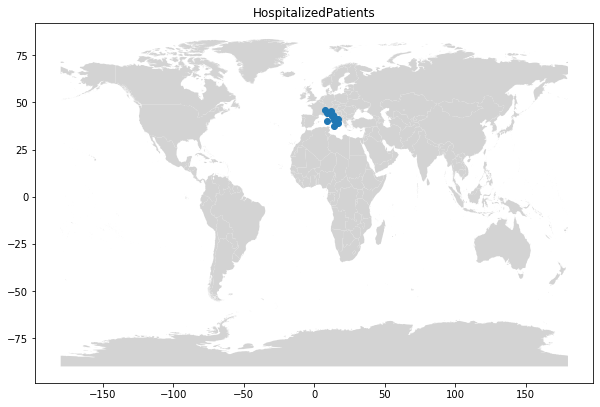

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
countries.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax)
ax.set_title('HospitalizedPatients')

In [16]:
gdf.explore()